In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, t
import pandas_datareader.data as web

%matplotlib inline
c = .7, .7, .7

In [2]:
stock = "AMZN"

In [3]:
data = web.DataReader(stock, data_source="google", start="2007-1-1", end="2017-04-28")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,38.68,39.06,38.05,38.70,12441282
2007-01-04,38.59,39.14,38.26,38.90,6328615
2007-01-05,38.72,38.79,37.60,38.37,6623820
2007-01-08,38.22,38.31,37.17,37.50,6784631
2007-01-09,37.60,38.06,37.34,37.78,5703051


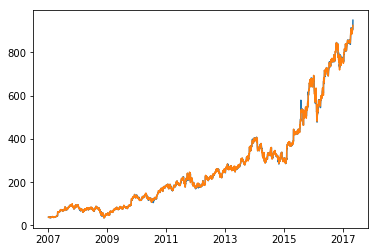

In [6]:
plt.plot(data.Open)
plt.plot(data["Close"])

In [7]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-24,908.68,909.99,903.82,907.41,3122893
2017-04-25,907.04,909.48,903.00,907.62,3380639
2017-04-26,910.30,915.75,907.56,909.29,2608948
2017-04-27,914.39,921.86,912.11,918.38,5305543
2017-04-28,948.83,949.59,924.33,924.99,7364681


In [8]:
data=data['Close']

In [9]:
#[_] (a single underscore) : stores previous output, like Python’s default interpreter.

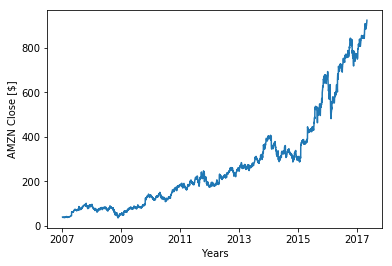

In [10]:
plt.plot(data)
plt.xlabel("Years")
plt.ylabel("AMZN Close [$]")

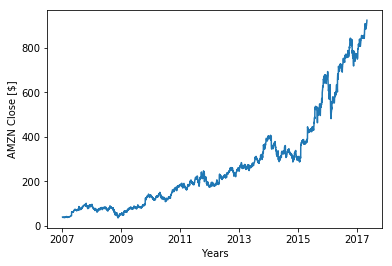

In [11]:
_ = plt.plot(data)
_ = plt.xlabel("Years")
_ = plt.ylabel("AMZN Close [$]")

In [12]:
cp = data.values
cp

array([  38.7 ,   38.9 ,   38.37, ...,  909.29,  918.38,  924.99])

In [13]:
len(cp)

2598

In [14]:
# return-series
ret = cp[1:]/cp[0:-1] - 1

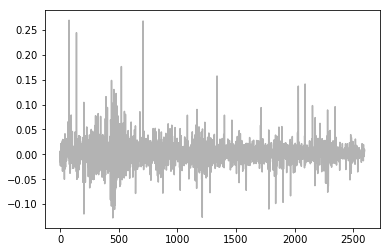

In [33]:
_ = plt.plot(ret, color=(0.7, 0.7, 0.7))


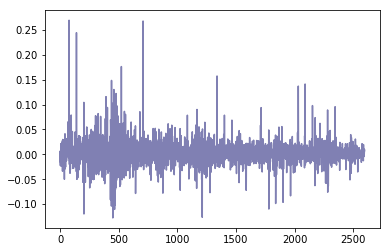

In [34]:
plt.plot(ret, color=(0.5, 0.5, 0.7))



In [35]:
ret.shape

(2597,)

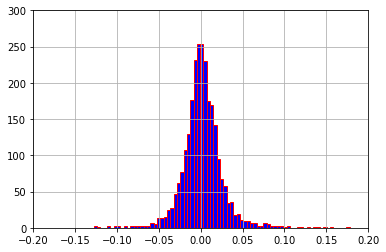

In [36]:
_ = plt.hist(ret, bins=100, color='b', edgecolor='r')
_ = plt.xlim([-0.2, 0.2])
_ = plt.ylim([0, 300])
_ = plt.grid("on")

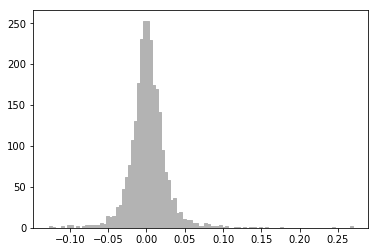

In [37]:
_ = plt.hist(ret, bins=100, color=c, edgecolor=c)

In [38]:
mu, sig = norm.fit(ret) # pick mean, sta

In [21]:
dof, mu2, sig2 = t.fit(ret) 

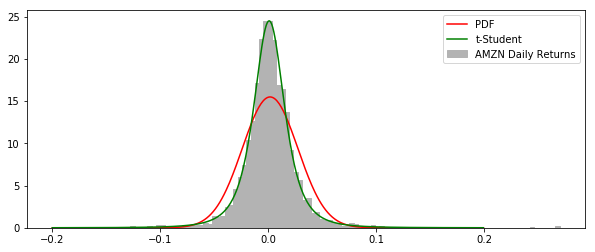

In [46]:
plt.figure(figsize=(10, 4)) #Outlook of the shape
plt.hist(ret, bins=100, color=c, edgecolor=c, normed=True, label="AMZN Daily Returns")

x = np.arange(-0.2, 0.2, 0.001)
pdf = norm.pdf(x, loc=mu, scale=sig)
pdf2 = t.pdf(x, dof, loc=mu2, scale=sig2)

plt.plot(x, pdf, 'r', label="PDF")
plt.plot(x, pdf2, 'g', label="t-Student")
plt.legend(loc="best")


In [47]:
np.sum(pdf*0.001)

0.99999999999998956

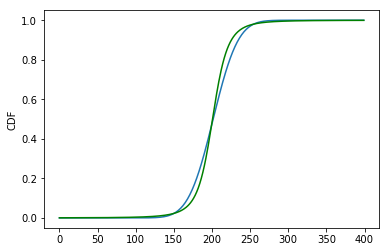

In [48]:
plt.plot(norm.cdf(x, loc=mu, scale=sig))
plt.plot(t.cdf(x, dof, loc=mu2, scale=sig2), 'g')
plt.ylabel("CDF")